# Student grades prediction

Project Description  
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades  
Columns Description-  total 43 columns  
-Seat No : The enrolled number of candidate that took the exams  

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.  
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam  

 
Predict - CGPA of a student based on different grades in four years.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#loading the dataset to a pandas dataframe
df = pd.read_csv('Grades.csv')

Data Ananlysis

In [8]:
#seeing first five rows of the dataframe
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [10]:
#seeing first last rows of the dataframe'
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [11]:
#number of rows and columns in the dataset
df.shape

(571, 43)

In [12]:
#getting basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [13]:
#checking the missing values in a dataset
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [14]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [15]:
#Lets rename columns for convenience and similarity
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [16]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [17]:
#Dropping seat.no. column as it has no role in dataset and model 
df.drop(columns=['Seat No.'],inplace=True)

In [18]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [19]:
# Filling missing values with most common value appearing in the dataset
df_i = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [20]:
#As we can see, there are no missing values.
df_i.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [21]:
df_i.reset_index(drop=True,inplace=True)

In [22]:
df_i.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [23]:
# For convenience and modeling , converting categorical values into numerical order
for column in df_i.columns:
    
    df_i[column]=df_i[column].replace('A+',4.0)
    df_i[column]=df_i[column].replace('A',4.0)
    df_i[column]=df_i[column].replace('A-',3.7)
    df_i[column]=df_i[column].replace('B+',3.4)
    df_i[column]=df_i[column].replace('B',3.0)
    df_i[column]=df_i[column].replace('B-',2.7)
    df_i[column]=df_i[column].replace('C+',2.4)
    df_i[column]=df_i[column].replace('C',2.0)
    df_i[column]=df_i[column].replace('C-',1.7)
    df_i[column]=df_i[column].replace('D+',1.4)
    df_i[column]=df_i[column].replace('D',1.0)
    df_i[column]=df_i[column].replace('F',0.0)

In [24]:
df_i.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [32]:
df_i['CGPA'].value_counts()

CGPA
3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: count, Length: 491, dtype: int64

In [33]:
df_i['CGPA'].max()

3.985

In [34]:
df_i['CGPA'].min()

0.8

In [40]:
df_i.describe()

,HS-101,CS-105,MT-331,CS-301,CS-302,TC-383,MT-442,CS-317,CS-403,CS-419,CS-423,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.628371,3.329247,3.086690,2.915587,3.114886,2.943783,3.266900,2.707881,3.152890,3.047811,2.997023,2.954888
std,0.908402,0.799826,0.948423,0.898724,0.780602,0.952288,0.855492,0.869497,0.852533,0.739991,0.880316,0.620552
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,2.400000,2.400000,2.700000,2.000000,3.000000,2.000000,2.700000,2.700000,2.400000,2.538000
50%,2.700000,3.700000,3.400000,3.000000,3.400000,3.000000,3.700000,2.700000,3.400000,3.000000,3.400000,3.029000
75%,3.400000,4.000000,4.000000,3.700000,3.700000,3.700000,4.000000,3.400000,4.000000,3.700000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


Data Visualization

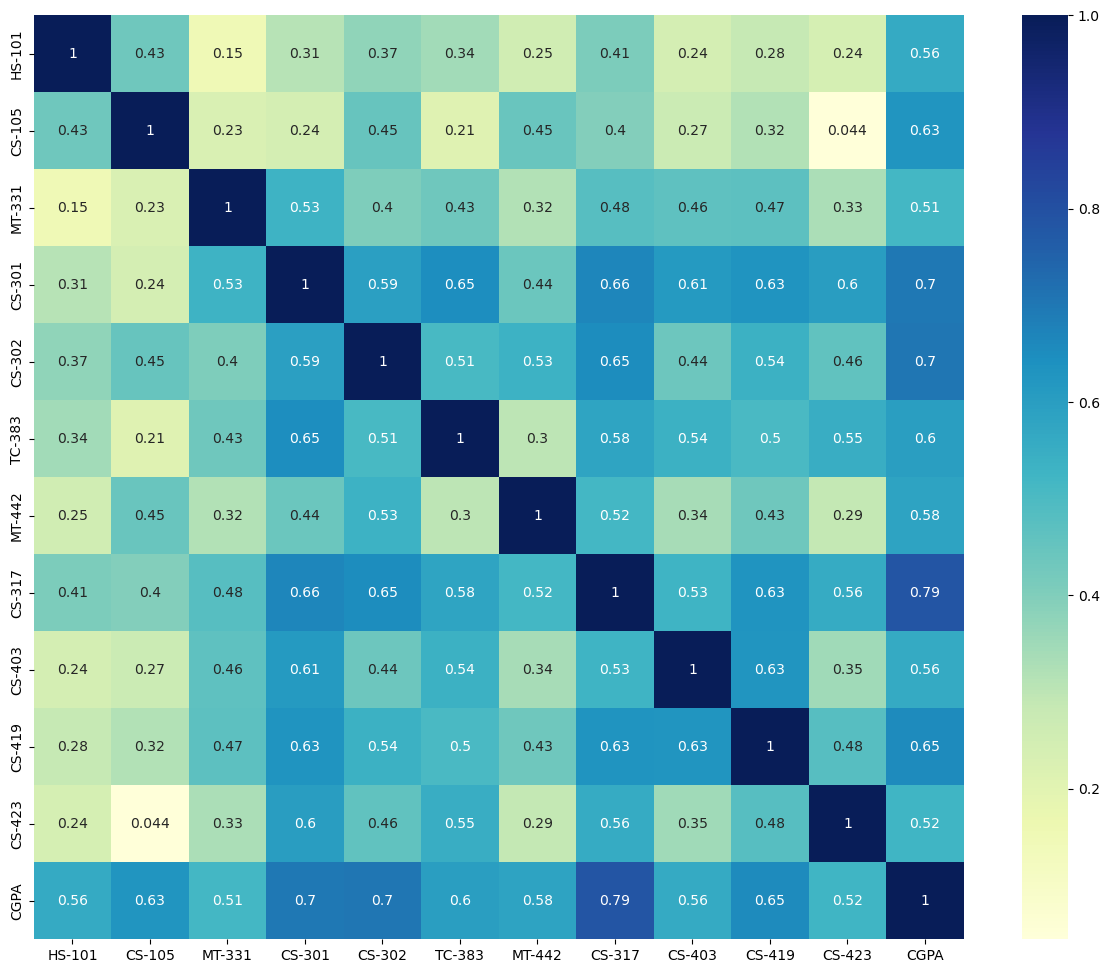

In [28]:
numeric_df_i = df_i.select_dtypes(include='number')
# Plot heatmap
plt.figure(figsize=[15, 12])
sns.heatmap(numeric_df_i.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [29]:
df_i['HS-101'].value_counts()

HS-101
3.7    82
2.7    78
2.0    68
3.0    63
3.4    59
1.7    50
2.4    47
1.0    45
4.0    42
1.4    36
0.0     1
Name: count, dtype: int64

In [30]:
df_i.dtypes

PH-121     object
HS-101    float64
CY-105     object
HS-105     object
MT-111     object
CS-105    float64
CS-106     object
EL-102     object
EE-119     object
ME-107     object
CS-107     object
HS-205     object
MT-222     object
EE-222     object
MT-224     object
CS-210     object
CS-211     object
CS-203     object
CS-214     object
EE-217     object
CS-212     object
CS-215     object
MT-331    float64
EF-303     object
HS-304     object
CS-301    float64
CS-302    float64
TC-383    float64
MT-442    float64
EL-332     object
CS-318     object
CS-306     object
CS-312     object
CS-317    float64
CS-403    float64
CS-421     object
CS-406     object
CS-414     object
CS-419    float64
CS-423    float64
CS-412     object
CGPA      float64
dtype: object

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 5000x3500 with 0 Axes>

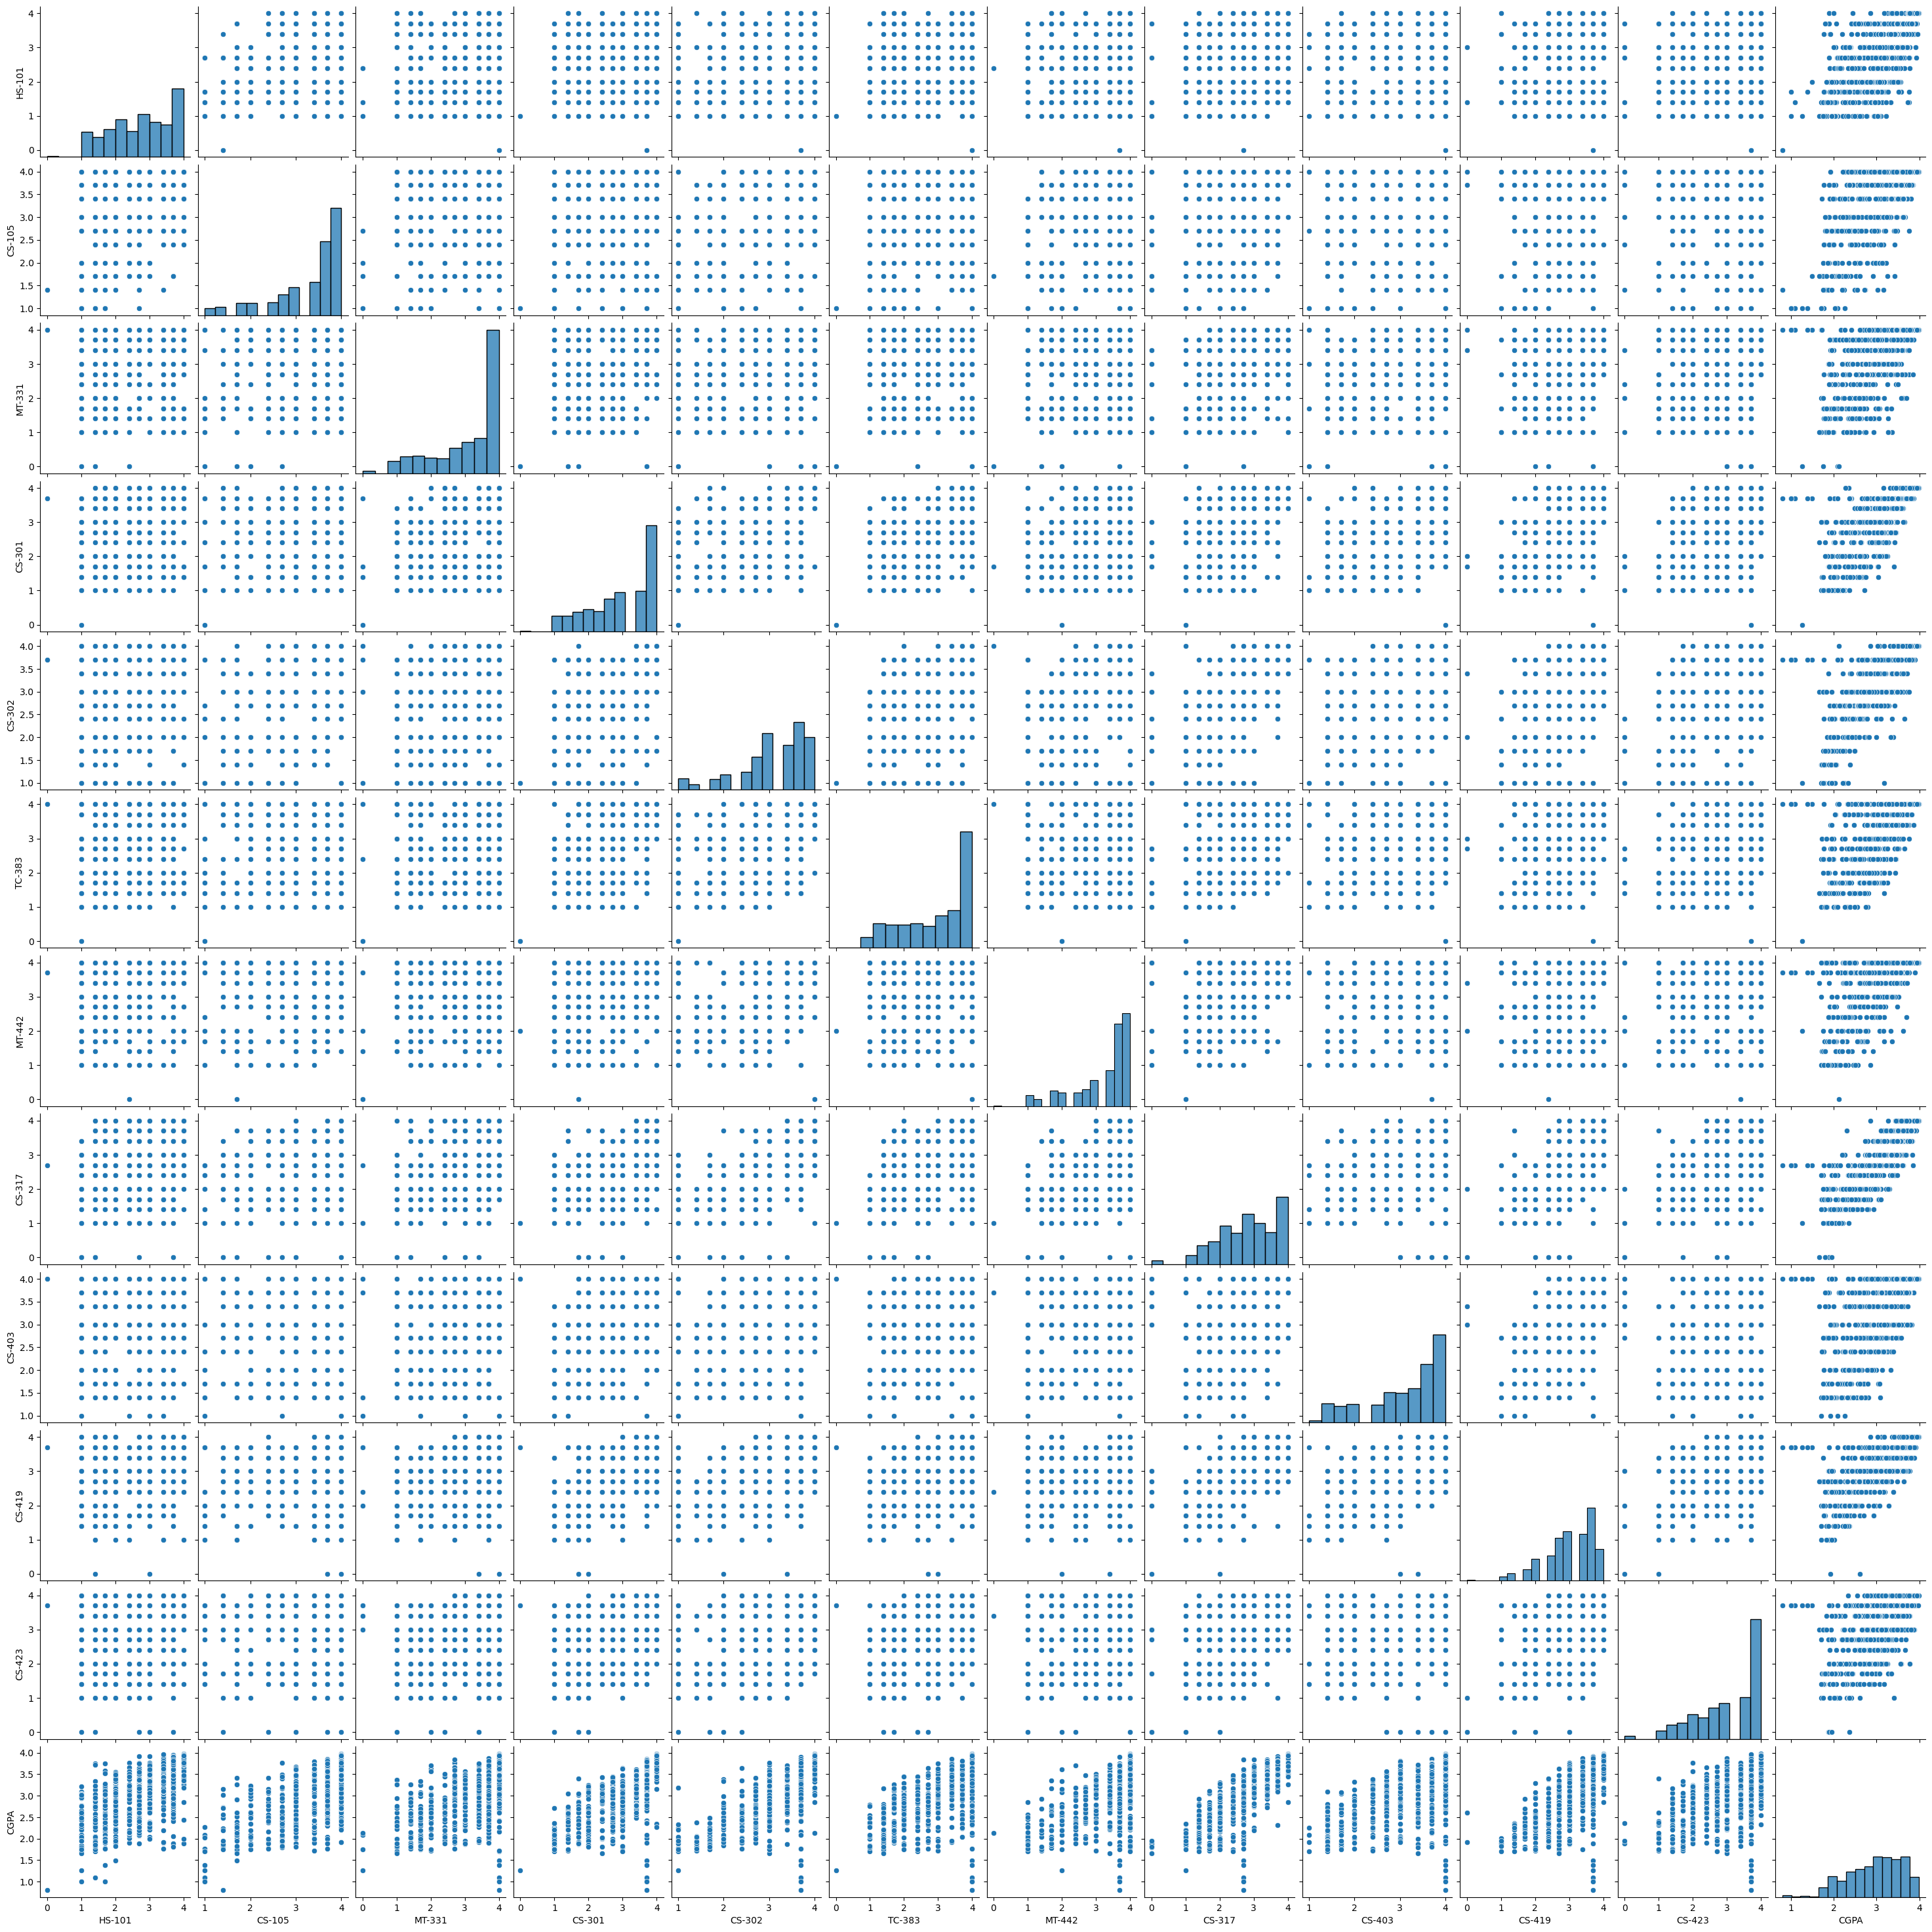

In [31]:
# Different distribution patterns of features
plt.figure(figsize=[50,35])
sns.pairplot(df_i)

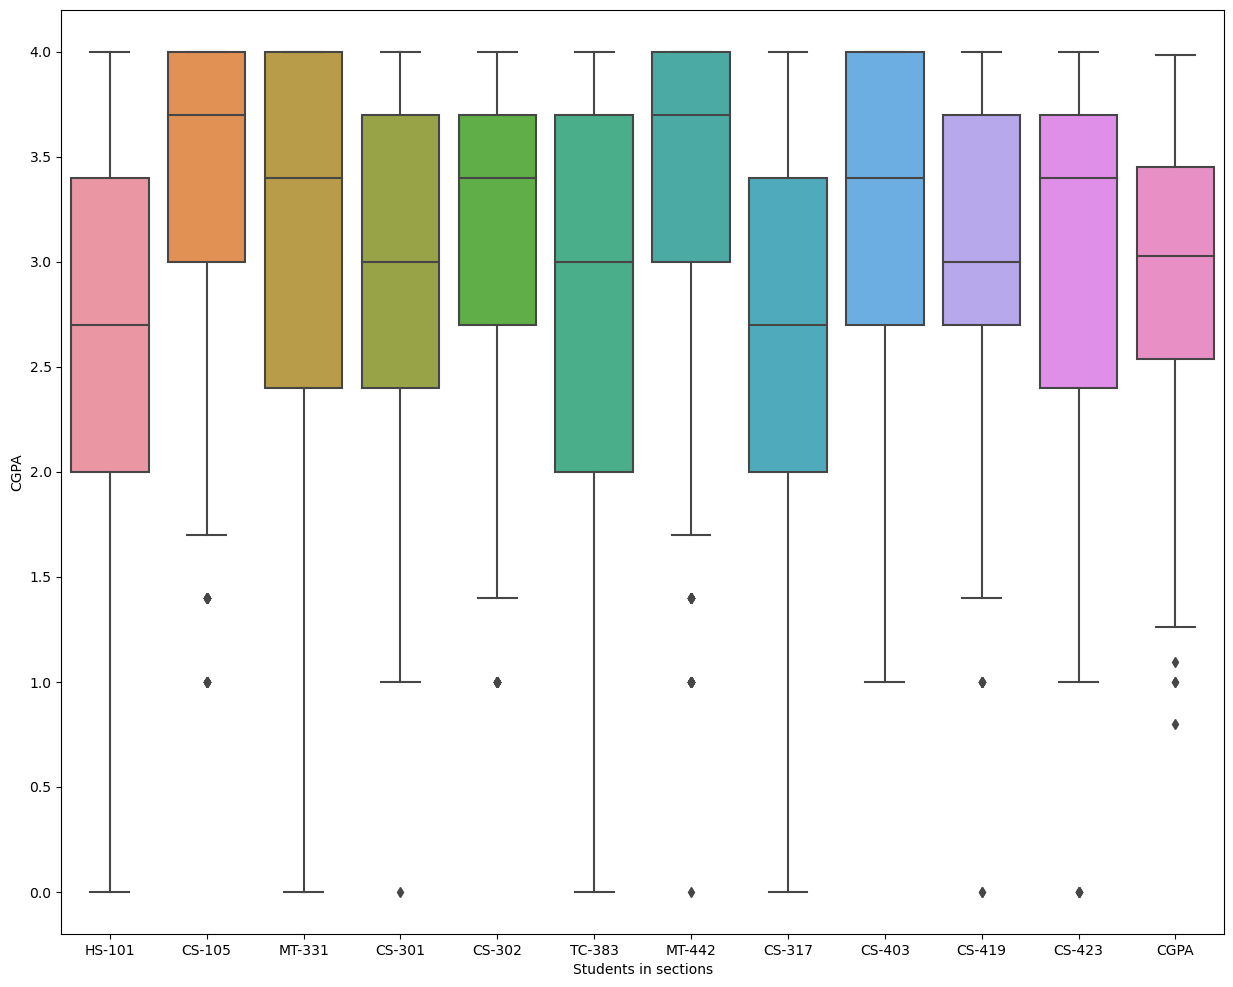

In [35]:
# Clearly can be seen that dataset has outliers
plt.figure(figsize=[15,12])
sns.boxplot(data=df_i)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')
plt.show()

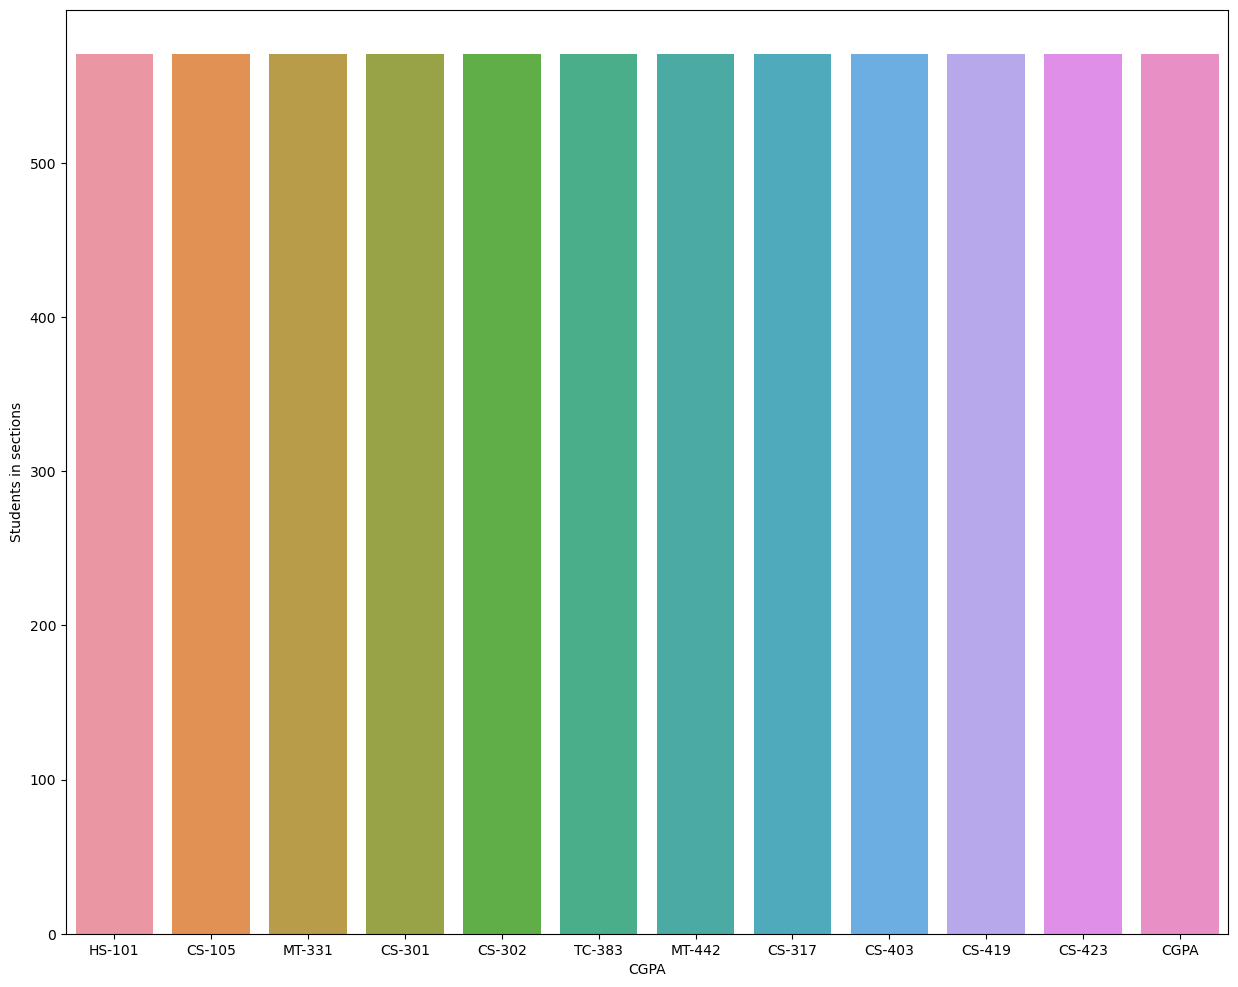

In [36]:
plt.figure(figsize=[15,12])
sns.countplot(data=df_i)
plt.xlabel('CGPA')
plt.ylabel('Students in sections')
plt.show()

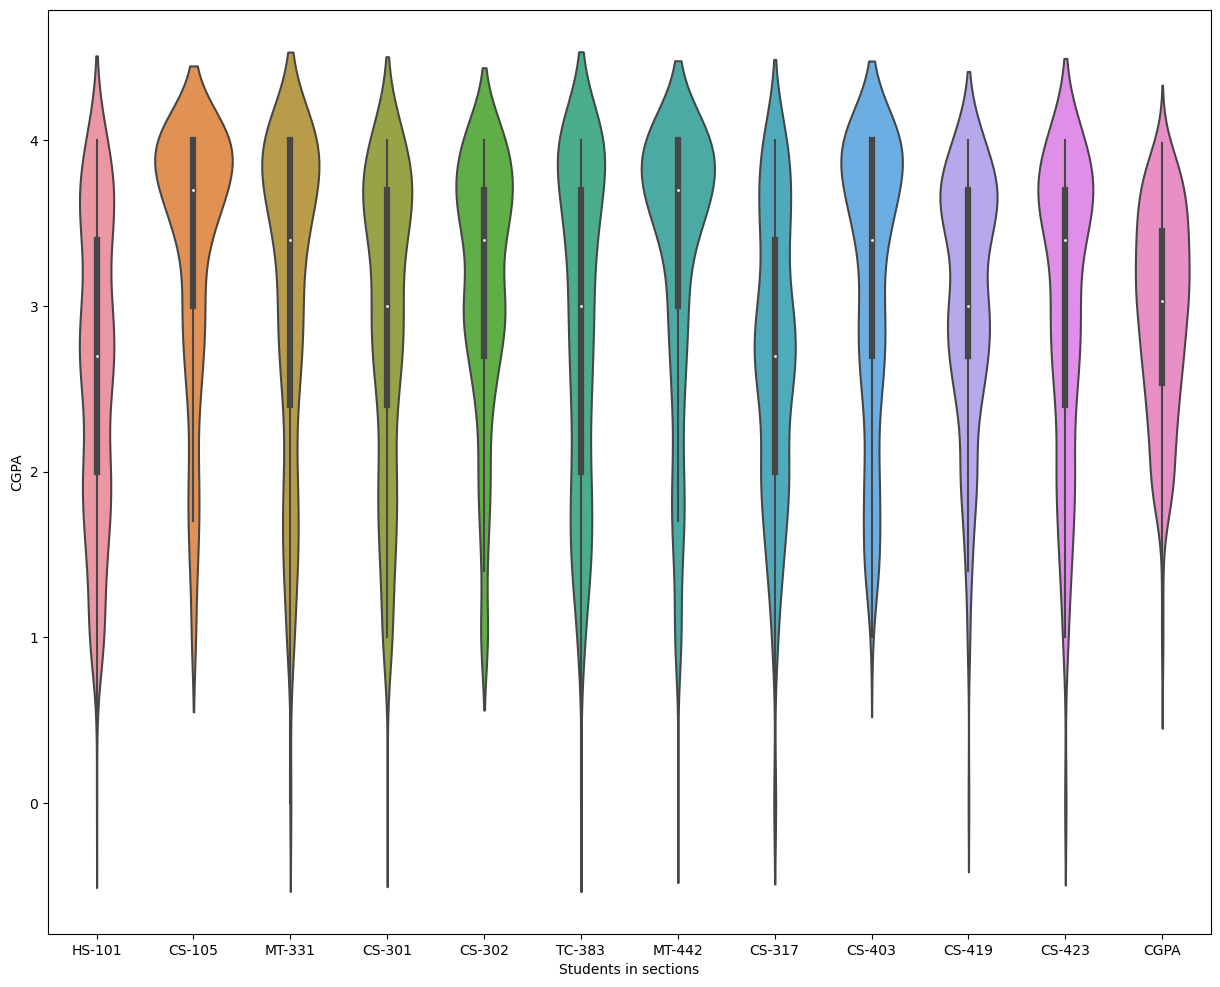

In [37]:
plt.figure(figsize=[15,12])
sns.violinplot(data=df_i)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')
plt.show()

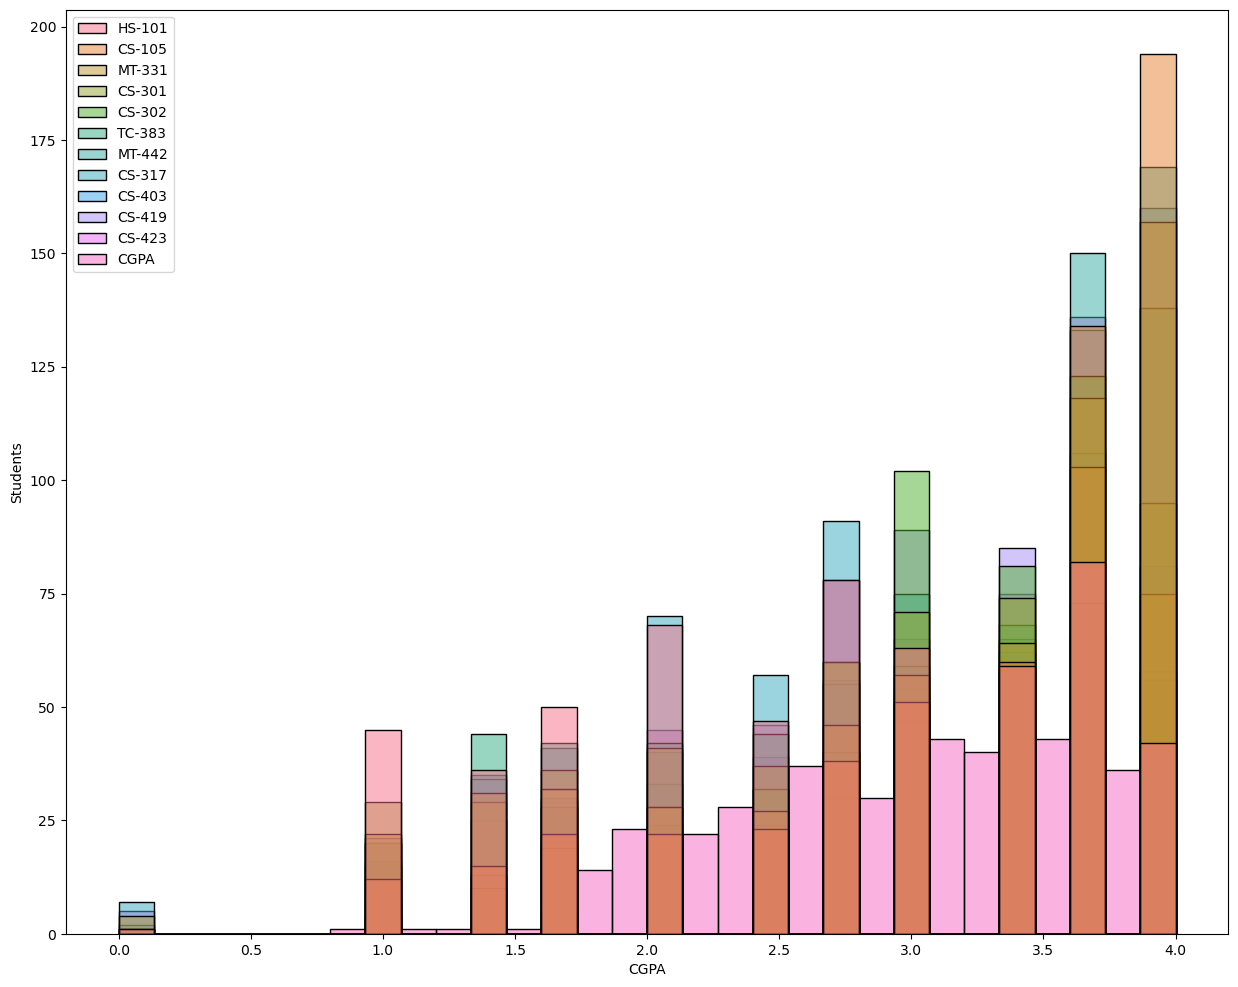

In [38]:
plt.figure(figsize=[15,12])
sns.histplot(data=df_i) 
plt.xlabel('CGPA')
plt.ylabel('Students')
plt.show()

<Axes: >

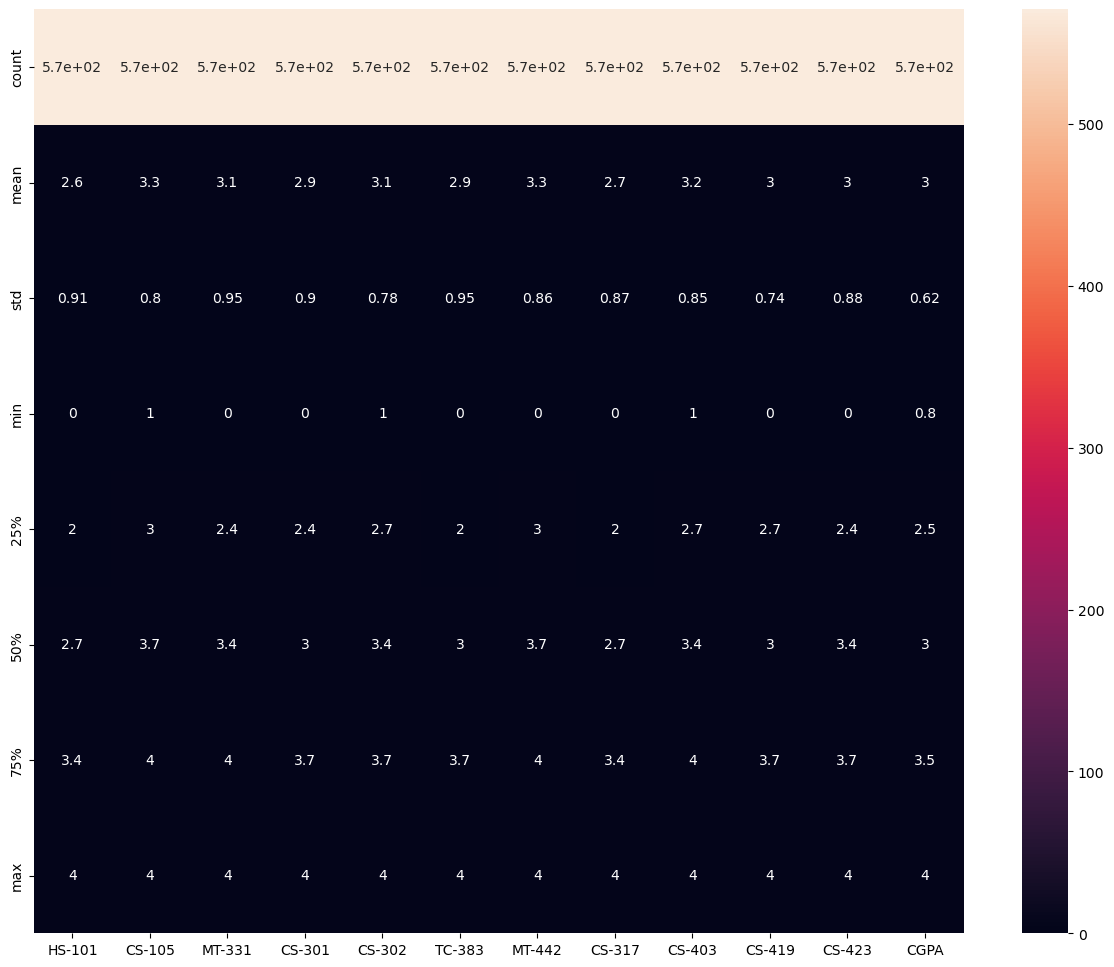

In [41]:
plt.figure(figsize=[15,12])
sns.heatmap(df_i.describe(),annot=True)

<Axes: xlabel='CGPA', ylabel='Count'>

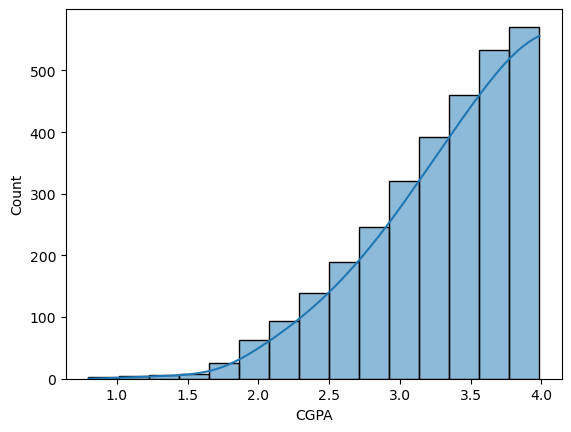

In [42]:
sns.histplot(df_i['CGPA'],cumulative=True, kde=True)

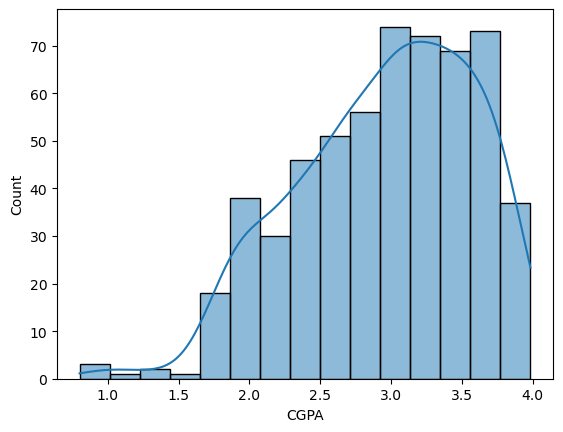

In [44]:
sns.histplot(df_i['CGPA'], kde=True)
plt.show()

In [54]:
object_cols = df_i.select_dtypes(include='object').columns

# Convert object columns to numeric
for col in object_cols:
    df_i[col] = pd.to_numeric(df_i[col], errors='coerce')

# Check data types after conversion
print(df_i.dtypes)

PH-121    float64
HS-101    float64
CY-105    float64
HS-105    float64
MT-111    float64
CS-105    float64
CS-106    float64
EL-102    float64
EE-119    float64
ME-107    float64
CS-107    float64
HS-205    float64
MT-222    float64
EE-222    float64
MT-224    float64
CS-210    float64
CS-211    float64
CS-203    float64
CS-214    float64
EE-217    float64
CS-212    float64
CS-215    float64
MT-331    float64
EF-303    float64
HS-304    float64
CS-301    float64
CS-302    float64
TC-383    float64
MT-442    float64
EL-332    float64
CS-318    float64
CS-306    float64
CS-312    float64
CS-317    float64
CS-403    float64
CS-421    float64
CS-406    float64
CS-414    float64
CS-419    float64
CS-423    float64
CS-412    float64
CGPA      float64
dtype: object


In [57]:
from collections import Counter

def outlier_hunt( df_i):
    outlier_indices = []
    
    for col in  df_i.columns.tolist():
        Q1 = np.percentile( df_i[col], 25)
        Q3 = np.percentile( df_i[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col =  df_i[( df_i[col] < Q1 - outlier_step) | ( df_i[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = [k for k, v in outlier_indices.items() if v > 2]
    
    return multiple_outliers   

# Assuming 'data' and 'features' are defined elsewhere
print('The dataset contains %d observations with more than 2 outliers' % len(outlier_hunt( df_i[features])))


The dataset contains 5 observations with more than 2 outliers


In [58]:
#removing outliers
outlier_indices = outlier_hunt(df_i[features])
df_i= df_i.drop(outlier_indices).reset_index(drop=True)
print(df_i.shape)

(566, 42)


In [73]:
# Input data
labels = df_i['CGPA'].values
# removing target variable
features=df_i.drop(['CGPA'],axis='columns')
features

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
562,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
563,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
564,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [60]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


Training Different Machine learning Models

a) Linear Regression

In [74]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [81]:
# Build a Model

from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Now, X_train_imputed contains no missing values, and you can proceed to train the model
lr_1.fit(X_train_imputed, y_train)


LinearRegression()

In [89]:
# Transform X_train and X_test using the imputer object
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Predict for training set
y_train_predict = lr_1.predict(X_train)

# Predict for test set
y_test_predict = lr_1.predict(X_test)


In [90]:
y_train_predict

array([3.77738615, 1.90372007, 3.63890602, 3.42559434, 3.57787975,
       2.73554915, 2.11051708, 3.74036213, 2.04030088, 3.45263792,
       3.011166  , 2.33753946, 2.47819228, 3.29673345, 3.94395204,
       3.46561722, 1.76689922, 3.01735781, 2.16540122, 3.58055867,
       3.74813064, 3.80076138, 3.5322981 , 2.91237406, 2.77639225,
       2.55570927, 2.8871738 , 2.02512957, 2.59356715, 3.17735754,
       2.87831942, 3.41796707, 3.59092431, 3.73434745, 2.86077443,
       3.69355197, 2.28889051, 2.67880655, 2.01336209, 1.96445729,
       3.15240115, 3.51397454, 2.29151646, 3.61693926, 3.45051663,
       3.68841351, 3.55668868, 2.5831765 , 3.35541374, 2.95879315,
       2.05107565, 2.0799433 , 3.66386145, 2.50002705, 1.79599013,
       1.9759745 , 2.68643816, 3.62831402, 2.45378643, 3.54172469,
       3.58910352, 3.96035057, 3.76393146, 3.16824104, 2.62596122,
       1.61737009, 2.37180746, 2.99856423, 3.42324205, 3.86541333,
       2.90535992, 3.30752766, 2.42946533, 2.97711602, 3.76415

In [91]:
y_test_predict

array([3.62944869, 1.9132874 , 3.5624962 , 2.74146769, 2.43498191,
       2.1447573 , 2.46679369, 1.90121826, 3.95271609, 3.23104579,
       1.83552   , 3.54941492, 2.58395938, 2.64513619, 3.66948158,
       2.55226707, 2.8734035 , 3.38067457, 3.55023088, 2.57598136,
       3.15823001, 3.56178331, 3.5270166 , 3.43185491, 3.1030217 ,
       2.73969234, 3.17602867, 2.9704571 , 2.7643971 , 3.54960437,
       3.51885538, 3.06092801, 3.46874582, 3.13250333, 2.97888832,
       3.66945721, 3.37826588, 3.07550465, 2.67788584, 2.70104225,
       3.52670989, 3.06937669, 1.90100228, 3.04817763, 1.76999259,
       3.70904581, 2.68236331, 2.99067136, 2.78843682, 2.67515699,
       3.70689346, 2.47963529, 2.49626678, 2.81905166, 2.91566814,
       3.74410431, 1.88391805, 3.28719482, 3.09078085, 3.78157353,
       2.31257547, 2.59711511, 3.13762465, 2.06057864, 2.61217066,
       3.27855254, 3.42229506, 3.56524904, 3.78683504, 3.54110537,
       2.33027532, 2.78659028, 3.7357321 , 2.2808255 , 2.82289

In [93]:

from sklearn.metrics import mean_squared_error , mean_absolute_error
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_1.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.1351767354867076
MAE is 0.07695027624589615
---------------------------------------
The model performance for testing set
RMSE is 0.22688698866065318
MAE is 0.11005855409099409
---------------------------------------
The score of model for testing set
Test score 0.85


In [94]:

compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,3.662,3.629449
1,1.787,1.913287
2,3.585,3.562496
3,2.750,2.741468
4,2.328,2.434982
...,...,...
165,1.876,1.560835
166,2.779,2.682876
167,2.087,2.031332
168,3.523,3.366515


2.Random Forest

In [95]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer object
X_test_imputed = imputer.transform(X_test)

# Initialize and train the RandomForestRegressor model
rf_1 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_1.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = rf_1.predict(X_test_imputed)


In [104]:
from sklearn import metrics
import numpy as np

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer object
X_test_imputed = imputer.transform(X_test)

# Make predictions on the test data
y_pred = rf_1.predict(X_test_imputed)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = rf_1.score(X_test_imputed, y_test)

# Print evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2_score)


Mean Absolute Error: 0.12011578947368423
Mean Squared Error: 0.023973321052631582
Root Mean Squared Error: 0.15483320397328082
R2 Score: 0.9316329041182846
